<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/Mapas/mapaBairros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Divisão de bairros cidade de Campina Grande - PB

In [ ]:
!pip install geopandas shapely mapclassify libpysal splot esda pysal
!pip install --upgrade pyshp
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal.weights import Queen
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd '/content/drive/My Drive/Notebooks_Doutorado/pb_setoress_censitarios'

!ls

/content/drive/My Drive/Notebooks_Doutorado/pb_setoress_censitarios
25SEE250GC_SIR.dbf  25SEE250GC_SIR.shp	Basico_PB.csv	   populacaoBairros.csv
25SEE250GC_SIR.prj  25SEE250GC_SIR.shx	mapa_campina.json


In [ ]:
setores = gp.read_file('/content/drive/My Drive/Notebooks_Doutorado/pb_setoress_censitarios/25SEE250GC_SIR.shp') 

In [ ]:
setores.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,34284,250400905000364,URBANO,250400905011,Cruzeiro,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,"POLYGON ((-35.90410 -7.23944, -35.90315 -7.239..."
1,34285,250400905000365,URBANO,250400905050,Velame,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,"POLYGON ((-35.90810 -7.25695, -35.90809 -7.256..."
2,34286,250400905000366,URBANO,250400905050,Velame,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,"POLYGON ((-35.90673 -7.25717, -35.90668 -7.257..."
3,34287,250400905000367,URBANO,250400905050,Velame,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,"POLYGON ((-35.91774 -7.27253, -35.91728 -7.272..."
4,34288,250400905000368,URBANO,250400905009,Cidades,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,"POLYGON ((-35.93276 -7.27225, -35.93247 -7.272..."


In [ ]:
setores.NM_MESO.unique()

array(['AGRESTE PARAIBANO', 'MATA PARAIBANA', 'BORBOREMA',
       'SERTÃO PARAIBANO'], dtype=object)

In [ ]:
setores.shape

(5574, 14)

In [ ]:
setores = setores.to_crs(epsg=3395)

In [ ]:
meso = setores.query('NM_MESO == "AGRESTE PARAIBANO"')
meso.shape

(1792, 14)

In [ ]:
muni = setores.query('NM_MUNICIP == "CAMPINA GRANDE"')
mapa_muni = muni.query('TIPO == "URBANO"')
mapa_muni.shape

(455, 14)

In [ ]:
bairros = mapa_muni.dissolve(by='NM_BAIRRO')
bairros.head()

,geometry,ID,CD_GEOCODI,TIPO,CD_GEOCODB,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO
NM_BAIRRO,,,,,,,,,,,,,
Acácio Figueiredo,"POLYGON ((-3998728.400 -805963.029, -3998736.9...",34177,250400905000248,URBANO,250400905049,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO
Alto Branco,"POLYGON ((-3993697.407 -799344.110, -3993723.7...",34068,250400905000139,URBANO,250400905002,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO
Araxá,"POLYGON ((-3997442.015 -798207.296, -3996493.5...",34133,250400905000204,URBANO,250400905003,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO
Bela Vista,"POLYGON ((-3996173.261 -800480.341, -3996215.6...",34042,250400905000113,URBANO,250400905004,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO
Bodocongó,"POLYGON ((-3998581.290 -801868.319, -3998588.6...",32858,250400905000301,URBANO,250400905005,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO


In [ ]:
bairros['NM_BAIRRO'] = bairros.index
bairros.index = range(len(bairros))
bairros.head()

,geometry,ID,CD_GEOCODI,TIPO,CD_GEOCODB,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,NM_BAIRRO
0,"POLYGON ((-3998728.400 -805963.029, -3998736.9...",34177,250400905000248,URBANO,250400905049,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,Acácio Figueiredo
1,"POLYGON ((-3993697.407 -799344.110, -3993723.7...",34068,250400905000139,URBANO,250400905002,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,Alto Branco
2,"POLYGON ((-3997442.015 -798207.296, -3996493.5...",34133,250400905000204,URBANO,250400905003,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,Araxá
3,"POLYGON ((-3996173.261 -800480.341, -3996215.6...",34042,250400905000113,URBANO,250400905004,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,Bela Vista
4,"POLYGON ((-3998581.290 -801868.319, -3998588.6...",32858,250400905000301,URBANO,250400905005,25040090500,None,250400905,CAMPINA GRANDE,2504009,CAMPINA GRANDE,CAMPINA GRANDE,AGRESTE PARAIBANO,Bodocongó


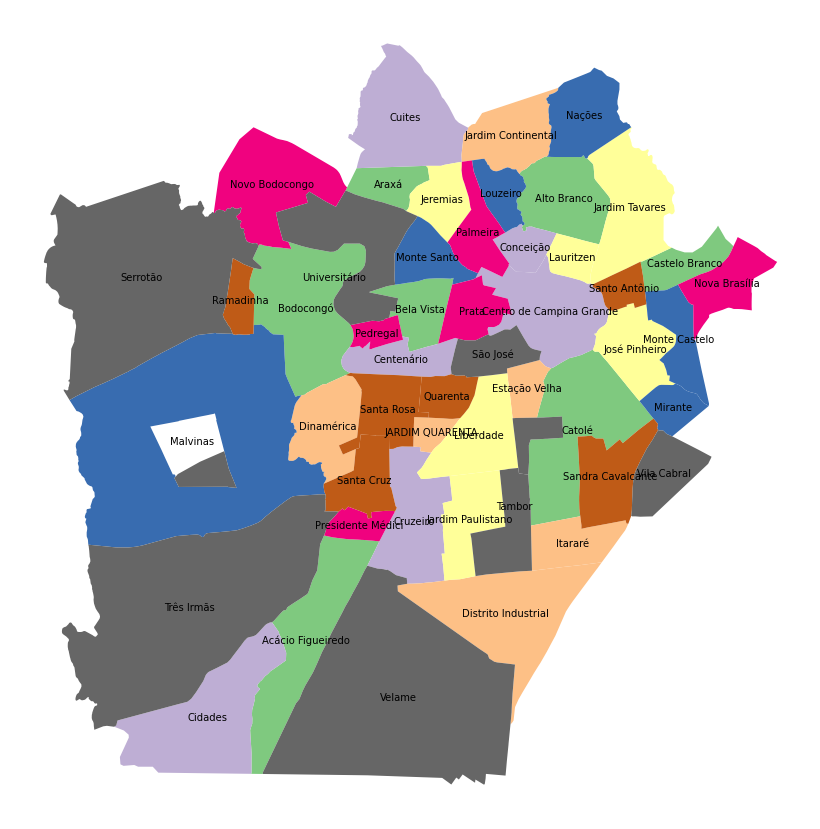

In [ ]:
ax = bairros.plot(figsize=(15,15), cmap='Accent')

for i in bairros.index:
    plt.text(bairros.geometry.centroid[i].coords[0][0], bairros.geometry.centroid[i].coords[0][1], bairros.NM_BAIRRO[i],
             fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.set_axis_off();

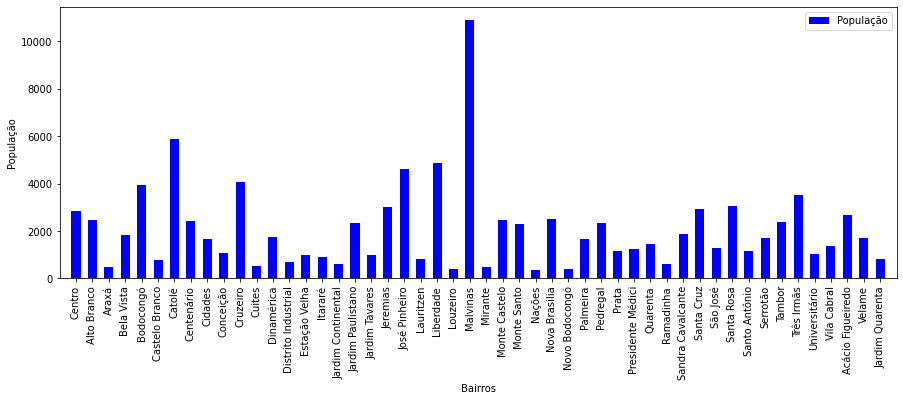

In [ ]:
bairros = []
habitantes = []
  
with open('./populacaoBairros.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        bairros.append(row[0])
        habitantes.append(int(row[1]))
  
plt.figure(figsize=(15, 5))
plt.bar(bairros, habitantes, color = 'b', width = 0.55, label = "População")
plt.tick_params(axis='x', labelrotation= 90)
plt.axis(xmin=-1, xmax=50)
plt.xlabel('Bairros')
plt.ylabel('População')
plt.legend()
plt.show()
